![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Classificação de Dígitos</font>



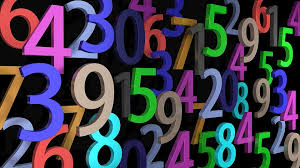

# 1° - Definindo Um Problema de Classificação Multiclasse (mais de 2 classes)

Faremos previsões de dígitos escritos à mão no dataset mnist. Esse é um exemplo de classificação multiclasse, pois nosso modelo terá que prever uma entre 10 saídas possíveis para cada registro (dígitos de 0 a 9).

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

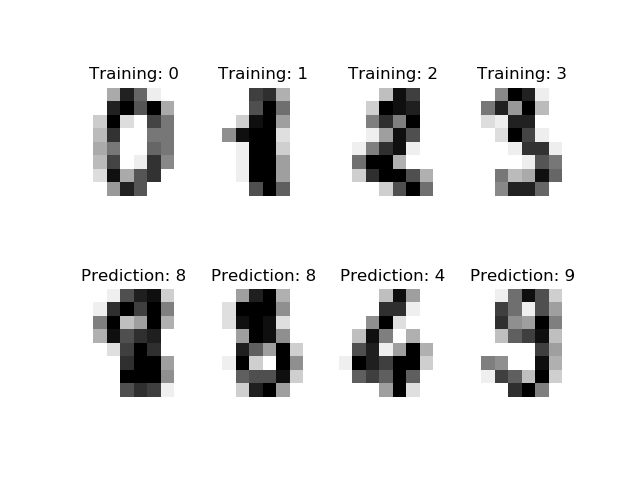

In [ ]:
# Imagens de 28 pixels em escala de Preto que vai de 0-255
from IPython.display import Image
Image('digitos.png')

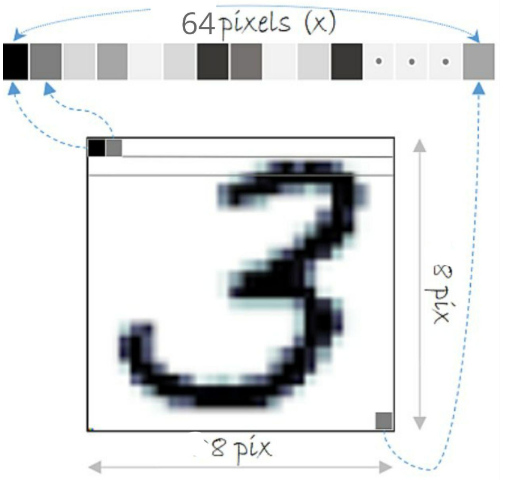

In [ ]:
# Transformaremos a Matriz de pixel 8x8 num vetor - Vide exemplo abaixo
# Cada item desse vetor é uma variável explicativa, umma variável de entrada do modelo.
from IPython.display import Image
Image('/content/digito3.PNG')

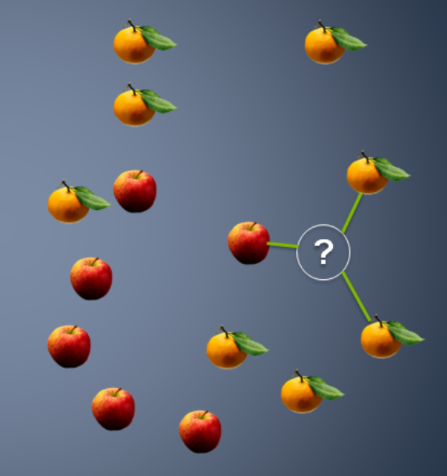

In [ ]:
from IPython.display import Image
Image('/content/maça-laranja.PNG')

# 2° - Carregando e Explorando o Dataset

In [ ]:
# Carrega os pacotes
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carrega o dataset
digitos = datasets.load_digits()

In [ ]:
digitos.target

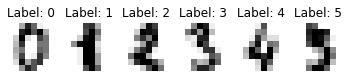

In [ ]:
# Visualizando algumas imagens e labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [ ]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [ ]:
# Formato de X e Y
# Cada uma das linhas representa os Pixels de 1 dígito
print(X.shape, Y.shape)

(1797, 64) (1797,)


#3° - Pré-Processamento e Normalização

In [ ]:
# Divisão em dados de treino e de teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

OBS ==> Vamos fazer validações durante o treinamento, pois se o treinamento durasse 5 horas, a gente já verifica a performance do modelo nesse período, e não somente depois das 5 horas....A gente está ganhando tempo...

In [ ]:
# Divisão dos dados de treino em dados de treino e dados de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, 
                                                                    Y_treino, 
                                                                    test_size = 0.1, 
                                                                    random_state = 84)

In [ ]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("Exemplos de Treino: {}".format(len(treinoLabels)))
print("Exemplos de Validação: {}".format(len(validLabels)))
print("Exemplos de Teste: {}".format(len(testeLabels)))

Exemplos de Treino: 1131
Exemplos de Validação: 126
Exemplos de Teste: 540


In [ ]:
# Normalização dos dados pela Média ( não é a única forma de fazer. Essa é uma Proposta somente.)

# Cálculo da média do dataset de treino - Calcular a média dos valores de entrada X
# Nesse caso vamos normalizar somente as variáveis de entrada X. Existem casos nos quais se faz necessário normalizar o Target "Y".
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

In [ ]:
# Shape dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


#4° - Construíndo a Máquina Preditiva - 



#### Testando o Melhor Valor de K - Etapa de Validação em treinamento

In [ ]:
# Range de valores de k que iremos testar
# Usar valores ímpares para evitar empate na votação do valor de K
kVals = range(1, 30, 2)

In [ ]:
# Lista vazia para receber as acurácias
acuracias = []

In [ ]:
# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
          
    # Validação - Avaliando o modelo e atualizando a lista de acurácias durante o treinamento
    score = modeloKNN.score(validData, validLabels)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

In [ ]:
# Por meio da validação em treinamento, posso nítidamente interromper o treinamento a partir de k=9, pois está só diminuindo a acurácia
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 100.00% nos dados de validação!


#### Construção e Treinamento da Máquina com KNN

In [ ]:
# Criando a versão final do modelo com o maior valor de k
# Poderia colocar o valor de K = 3 diretamente. Mas para deixar mais automatizado, colocamos o valor "i"
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [ ]:
# Treinamento do modelo
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Obs:** Lembre-se que vc pode alterar os hyperparâmetros do modelo. Experimente alterar o metric = 'euclidean'

#5° - Avaliação da Máquina Preditiva - Previsões com Dados de Teste

In [ ]:
# Previsões com os dados de teste
predictions = modeloFinal.predict(testeData)

In [ ]:
# Performande do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(testeLabels, predictions))

In [ ]:
# Confusion Matrix do Modelo Final
print ("Confusion matrix")
print(confusion_matrix(testeLabels, predictions))

Eu acredito que esse dígito seja: 9


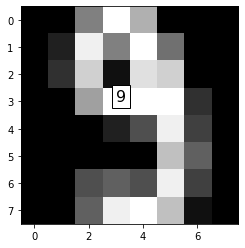

Eu acredito que esse dígito seja: 5


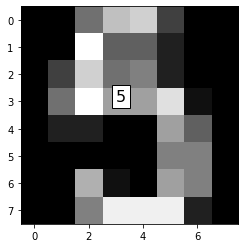

Eu acredito que esse dígito seja: 0


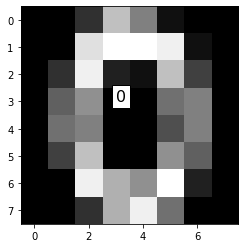

Eu acredito que esse dígito seja: 3


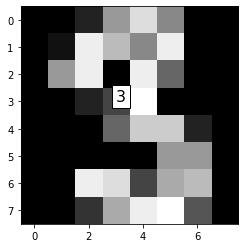

Eu acredito que esse dígito seja: 1


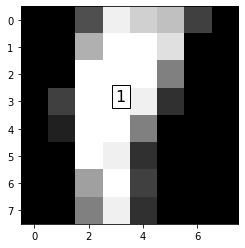

In [ ]:
# Fazendo previsões com o modelo treinado usando dados de teste
# Para isso, vou buscar 5 valores randômicos da base de teste para fazer novas previsões para ver se o modelo está bom...
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
         
    # Obtém uma imagem e faz a previsão
    image = testeData[i]
    prediction = modeloFinal.predict([image])[0]
         
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Eu acredito que esse dígito seja: {}".format(prediction))
    plt.show()

# 6° - Previsões em Novos Dados com o Modelo Treinado

Só para lembrar: Nosso modelo foi criado para prever dígitos. Logo, não serve para prever valor de casas, nem fraudes de cartão de crédito.....Cada modelo com seu propósito, ok?

In [ ]:
# Definindo um novo dígito (dados de entrada)
# Preciso entregar para o modelo UM DIGITO. Ele é um conjunto de 64 pixels (lembra?)
novoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [ ]:
# Normalizando o novo dígito - Precisa fazer esse pre-processamento pois o modelo aprendeu com dados normalizados....ok?
novoDigito_norm = novoDigito - X_norm

In [ ]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [6]


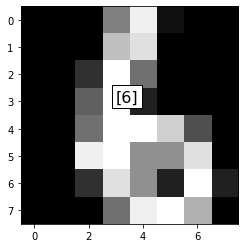

In [ ]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()

In [ ]:
# Definindo um novo dígito (dados de entrada)
novoDigito = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [ ]:
# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

In [ ]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

In [ ]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()

# Fim

## Valeu!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>

### #Facebook - Ciencia dos Dados <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdadosraiz">https://t.me/cienciadosdadosraiz</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/c4wDGK9eUyc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')